In [1]:
import time

import numpy
import matplotlib.pyplot

from kinetic_project.optimizations.subgradient_methods import (
    objective_function,
    run_multiple_initializations_parallel,
)

In [2]:
def f_1(x: float) -> float:
    return 2 * x ** (1 / 3)


def f_2(x: float) -> float:
    return 5 * x**2


def f_3(x: float) -> float:
    return x + 1 if x > 0.5 else 0

In [3]:
start_time = time.time()
funcs = [
    # Functions must be defined explicitly,
    # instead of as lambda functions, due to
    # pickling requirements of multiprocessing.
    f_1,
    f_2,
    f_3,
]
argmax = True

(best_x, best_value, best_lambda, best_history), all_results = (
    run_multiple_initializations_parallel(
        funcs, num_starts=20, argmax=argmax
    )
)
best_value = -best_value if argmax else best_value

print("Optimal arguments:", best_x)
print("Objective function value: ", best_value)
print(f"Total subgradient_descent time: {(time.time()-start_time)} s")

Optimal arguments: [0.024042  0.9759587 0.       ]
Objective function value:  5.339713078360893
Total subgradient_descent time: 0.10875248908996582 s


In [4]:
def objective(x, funcs, argmax):
    x1, x2 = x[0], x[1]
    x3 = 1 - x1 - x2  # Enforce the simplex constraint.
    if x3 < 0:  # Outside the simplex.
        return numpy.inf
    x_vals = numpy.array([x1, x2, x3])
    return objective_function(x_vals, funcs, argmax)

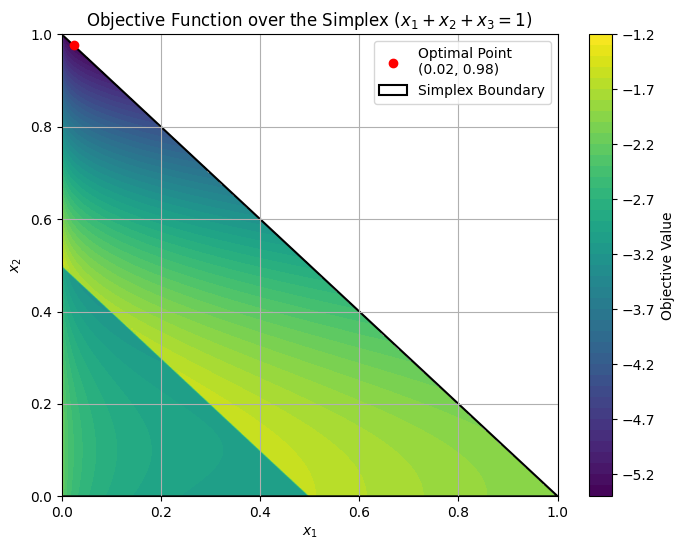

In [5]:
# Define the simplex domain:
x1_values = numpy.linspace(0, 1, 200)
x2_values = numpy.linspace(0, 1, 200)
x1_grid, x2_grid = numpy.meshgrid(x1_values, x2_values)

# Compute the objective function values over the simplex:
objective_values = numpy.zeros_like(x1_grid)
for i in range(x1_grid.shape[0]):
    for j in range(x1_grid.shape[1]):
        x1 = x1_grid[i, j]
        x2 = x2_grid[i, j]
        x = numpy.array([x1, x2])
        if x1 + x2 <= 1:  # Only compute values within the simplex.
            objective_values[i, j] = objective(x, funcs, argmax)
        else:
            objective_values[i, j] = numpy.nan  # Mark outside the simplex as NaN.

# Plot the contour map:
matplotlib.pyplot.figure(figsize=(8, 6))
contour = matplotlib.pyplot.contourf(x1_grid, x2_grid, objective_values, levels=50, cmap="viridis")
matplotlib.pyplot.colorbar(contour, label="Objective Value")
matplotlib.pyplot.plot(best_x[0], best_x[1], 'ro', label=f"Optimal Point\n({best_x[0]:.2f}, {best_x[1]:.2f})")
matplotlib.pyplot.fill([0, 1, 0], [0, 0, 1], color='none', edgecolor='black', linewidth=1.5, label="Simplex Boundary")
matplotlib.pyplot.xlabel('$x_1$')
matplotlib.pyplot.ylabel('$x_2$')
matplotlib.pyplot.title('Objective Function over the Simplex ($x_1 + x_2 + x_3 = 1$)')
matplotlib.pyplot.legend()
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

